In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import src.data.prepare as prep
import src.data.seizures as seiz
import src.data.validator as val
import src.algorithms.variance_algorithm as valgo
import src.visualization.seizures as seiz_vis



In [2]:
names = prep.listValidatorFiles()
print(names)

['2015-09-02T1826', '2015-09-02T1928', '2016-07-11T1513', '2016-07-11T1636', '2016-07-26T1107', '2016-10-13T1513', '2016-10-13T1707', '2016-10-19T1635', '2016-10-19T1708', '2018-10-16T1323', '2018-10-23T1208', '2018-10-23T1242', '2019-02-20T1154']


In [3]:
name = '2018-10-16T1323'

In [4]:
algo_seizures_df = valgo.load(name)
data = prep.load_data(name, 'raw', load_seizures=True)
raw = data['data']
real_seizures_df = data['real_seizures_df']
print(real_seizures_df.tail())
print(algo_seizures_df.tail())

               start             end          length
s_nr                                                
168  00:29:09.370000 00:29:12.450000 00:00:03.080000
169  00:29:25.420000 00:29:27.255000 00:00:01.835000
170  00:29:28.550000 00:29:31.055000 00:00:02.505000
171  00:29:53.020000 00:29:55.120000 00:00:02.100000
172  00:29:58.480000 00:30:03.325000 00:00:04.845000
               start             end          length
s_nr                                                
433  00:29:48.972500 00:29:49.194500 00:00:00.222000
434  00:29:53.426000 00:29:54.653500 00:00:01.227500
435  00:29:58.490000 00:30:02.416000 00:00:03.926000
436  00:30:02.956500 00:30:03.195500 00:00:00.239000
437  00:30:08.088000 00:30:08.332500 00:00:00.244500


In [5]:
report = val.report(name, 'variance_algorithm', algo_seizures_df)

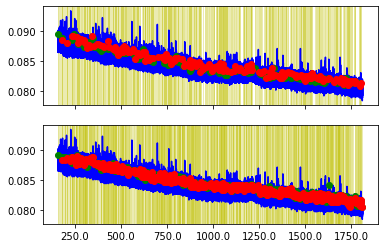

In [6]:
#%matplotlib auto
seiz_vis.plot_seizure_comparison(raw, real_seizures_df, algo_seizures_df)

In [7]:
classification = val.analyse(raw, real_seizures_df, algo_seizures_df)

In [8]:
perc = val.classification_percentages(classification)
print(perc)

      percentage
type            
TP      0.547741
TN      0.286420
FN      0.139209
FP      0.026630


In [9]:
val.sensitivity(classification)*100

79.73516835669214

In [10]:
val.specifity(classification)*100

91.4933959955151

In [11]:
val.negativePredictiveValue(classification)*100

67.2933085152708

In [12]:
val.positivePredictiveValue(classification)*100

95.36363502150195

In [13]:
val.accuracy(classification)*100

83.41608116293156

In [14]:
#print(algo_seizures_df.index)
#print(algo_seizures_df.iloc[[5,6]]['start'])
#print(real_s_t_algo_s['algo_start_nr'].values)
#print( algo_seizures_df.iloc[real_s_t_algo_s['algo_start_nr'].values]['start'])


In [15]:
mismatch_df = val.create_mismatch_df( real_seizures_df, algo_seizures_df)
print(mismatch_df['mismatch_start'].describe())
print(mismatch_df['mismatch_end'].describe())
print(mismatch_df.tail())

count    173.000000
mean       0.233373
std        0.544581
min       -2.142000
25%        0.007000
50%        0.186500
75%        0.352500
max        6.070500
Name: mismatch_start, dtype: float64
count    173.000000
mean      -0.059173
std        0.572702
min       -1.288500
25%       -0.161000
50%        0.023000
75%        0.040500
max        5.811500
Name: mismatch_end, dtype: float64
      algo_start_nr  algo_end_nr      real_start        real_end  \
s_nr                                                               
168             422          422 00:29:09.370000 00:29:12.450000   
169             424          424 00:29:25.420000 00:29:27.255000   
170             425          425 00:29:28.550000 00:29:31.055000   
171             434          434 00:29:53.020000 00:29:55.120000   
172             435          436 00:29:58.480000 00:30:03.325000   

          algo_start        algo_end  mismatch_start  mismatch_end  
s_nr                                                          

In [16]:
correct_algo_s = val.correct_seizures(algo_seizures_df, mismatch_df)
print(len(correct_algo_s))
correct_algo_s.index

78


Int64Index([  0,  12,  13,  28,  29,  34,  37,  62,  66,  70,  73,  74,  81,
             82,  83,  84,  91,  92,  93,  99, 107, 128, 135, 137, 138, 139,
            142, 159, 160, 165, 174, 181, 191, 197, 204, 206, 212, 213, 217,
            220, 221, 226, 228, 236, 250, 251, 253, 257, 258, 259, 273, 278,
            285, 286, 287, 288, 289, 290, 302, 303, 305, 306, 312, 314, 346,
            354, 362, 368, 400, 405, 406, 410, 413, 414, 422, 424, 425, 434],
           dtype='int64', name='s_nr')

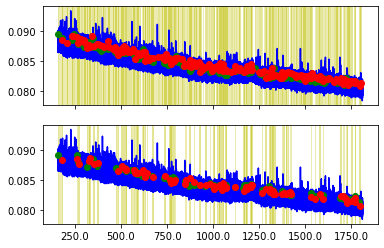

In [17]:
seiz_vis.plot_seizure_comparison(raw, real_seizures_df, correct_algo_s)

In [18]:
partly_c_algo_s = val.partly_correct_seizures(algo_seizures_df, mismatch_df)
partly_c_algo_s.index

Int64Index([  1,   2,   3,   4,   5,   7,   8,  11,  15,  17,
            ...
            393, 399, 407, 408, 416, 418, 420, 421, 435, 436],
           dtype='int64', name='s_nr', length=186)

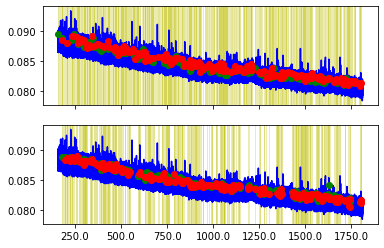

In [19]:
seiz_vis.plot_seizure_comparison(raw, real_seizures_df, partly_c_algo_s)

In [20]:
wrong_algo_s = val.wrong_seizures(algo_seizures_df, mismatch_df)
wrong_algo_s.index

Int64Index([  6,   9,  10,  14,  16,  18,  20,  23,  26,  32,
            ...
            423, 426, 427, 428, 429, 430, 431, 432, 433, 437],
           dtype='int64', name='s_nr', length=174)

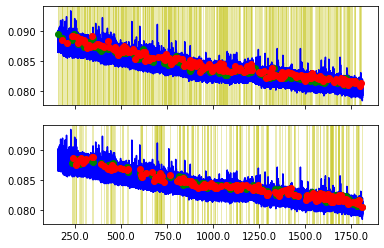

In [21]:
seiz_vis.plot_seizure_comparison(raw, real_seizures_df, wrong_algo_s)

In [22]:
#TODO within seizures

In [23]:
#TODO make plot which uses differenct colors but plots all four